Name: VenkateshJamge
Subject: DSBDA Lab  
Roll Number: 31135
Assignment-02: Data Wrangling-II


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
data = pd.read_csv("Academics.csv")
df = pd.DataFrame(data)


In [3]:
print(df.columns)


Index(['Name', 'Age', 'EM3', 'OOP', 'DS', 'DSA'], dtype='object')


In [4]:
df.head(5)


,Name,Age,EM3,OOP,DS,DSA
0,Adam,16.0,70.0,40,92.0,26
1,Adrian,16.0,77.0,41,64.0,21
2,Alan,40.0,71.0,41,100.0,38
3,Alexander,17.0,65.0,48,68.0,25
4,Rachel,49.0,80.0,44,72.0,49


In [5]:
df.tail(5)


,Name,Age,EM3,OOP,DS,DSA
107,Marietta,NaN,76.0,42,96.0,24
108,Saundra,16.0,31.0,48,80.0,31
109,Scottie,15.0,55.0,43,70.0,45
110,Jodie,15.0,74.0,45,73.0,21
111,Jarrod,16.0,75.0,49,72.0,46


In [6]:
df.describe()


,Age,EM3,OOP,DS,DSA
count,99.000000,105.000000,112.000000,109.000000,112.000000
mean,21.727273,59.857143,47.660714,80.229358,35.178571
std,11.345968,14.528770,6.021813,11.660024,8.936426
min,15.000000,30.000000,38.000000,60.000000,20.000000
25%,15.000000,49.000000,44.000000,72.000000,27.750000
50%,16.000000,62.000000,46.000000,79.000000,35.000000
75%,19.000000,72.000000,49.000000,91.000000,43.000000
max,50.000000,80.000000,69.000000,100.000000,50.000000


In [7]:
shape = df.shape
size = df.size
print("Dimenation of data frame: {}".format(shape))
print("Size of data frame: {}".format(size))


Dimenation of data frame: (112, 6)
Size of data frame: 672


In [8]:
df.dtypes


Name     object
Age     float64
EM3     float64
OOP       int64
DS      float64
DSA       int64
dtype: object

In [9]:
df1 = df.copy()


#### Missing Values Checking -

In [10]:
df1.isna().sum()


Name     0
Age     13
EM3      7
OOP      0
DS       3
DSA      0
dtype: int64

In [11]:
#replacing missing values by mean value
df1["EM3"] = df1["EM3"].fillna(df1["EM3"].mean())
df1["DS"] = df1["DS"].fillna(df1["DS"].mean())
df1["Age"] = df1["Age"].fillna(df1["Age"].mean())


In [12]:
df1.isna().sum()


Name    0
Age     0
EM3     0
OOP     0
DS      0
DSA     0
dtype: int64

#### Outliers Checking -

In [13]:
df.describe()


,Age,EM3,OOP,DS,DSA
count,99.000000,105.000000,112.000000,109.000000,112.000000
mean,21.727273,59.857143,47.660714,80.229358,35.178571
std,11.345968,14.528770,6.021813,11.660024,8.936426
min,15.000000,30.000000,38.000000,60.000000,20.000000
25%,15.000000,49.000000,44.000000,72.000000,27.750000
50%,16.000000,62.000000,46.000000,79.000000,35.000000
75%,19.000000,72.000000,49.000000,91.000000,43.000000
max,50.000000,80.000000,69.000000,100.000000,50.000000


/home/pict/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

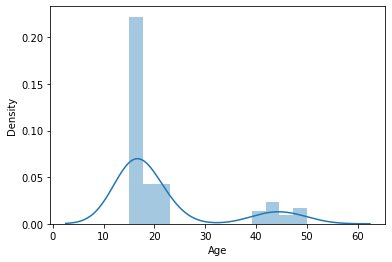

In [14]:
sns.distplot(df1['Age'])


In [15]:
df1["Age"] = df1["Age"].astype('int')


In [16]:
Q1 = df1.Age.quantile(0.25)
Q3 = df1.Age.quantile(0.75)


#IQR
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


(6.0, 30.0)

In [17]:
df1[(df1.Age < lower_limit) | (df1.Age > upper_limit)]


,Name,Age,EM3,OOP,DS,DSA
2,Alan,40,71.000000,41,100.000000,38
4,Rachel,49,80.000000,44,72.000000,49
5,Rebecca,41,66.000000,45,91.000000,32
9,Lily,42,70.000000,55,63.000000,31
10,Lisa,43,59.857143,44,82.000000,23
12,Maria,44,79.000000,45,80.229358,40
14,Megan,44,56.000000,41,89.000000,39
19,Nicola,45,71.000000,44,85.000000,37
22,Nicola,46,75.000000,42,74.000000,44
25,Joseph,47,77.000000,61,80.229358,41


In [18]:
df1[(df1.Age > lower_limit) & (df1.Age < upper_limit)]

,Name,Age,EM3,OOP,DS,DSA
0,Adam,16,70.0,40,92.0,26
1,Adrian,16,77.0,41,64.0,21
3,Alexander,17,65.0,48,68.0,25
6,Rose,19,54.0,49,94.0,35
7,Ruth,15,72.0,50,98.0,42
...,...,...,...,...,...,...
107,Marietta,21,76.0,42,96.0,24
108,Saundra,16,31.0,48,80.0,31
109,Scottie,15,55.0,43,70.0,45
110,Jodie,15,74.0,45,73.0,21


In [19]:
m = df1['Age'].median()
m

17.0

In [20]:
df1['Age'] = np.where(((df1.Age < lower_limit) | (
    df1.Age > upper_limit)), m, df1['Age'])


In [21]:
df1[(df1.Age < lower_limit) | (df1.Age > upper_limit)]


,Name,Age,EM3,OOP,DS,DSA


#### Data Transformation -

/home/pict/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OOP', ylabel='Density'>

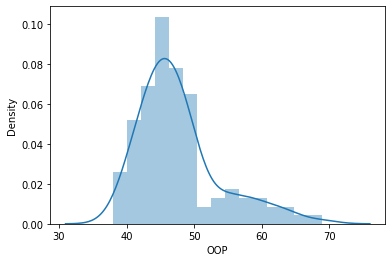

In [22]:
sns.distplot(df1['OOP'])


/home/pict/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqrt_OOP', ylabel='Density'>

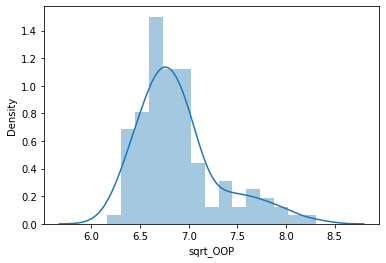

In [23]:
df1['sqrt_OOP'] = df1['OOP'].apply(np.sqrt)
sns.distplot(df1['sqrt_OOP'])


In [24]:
df1.describe()


,Age,EM3,OOP,DS,DSA,sqrt_OOP
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,16.964286,59.857143,47.660714,80.229358,35.178571,6.890878
std,1.926246,14.063196,6.021813,11.501377,8.936426,0.422019
min,15.000000,30.000000,38.000000,60.000000,20.000000,6.164414
25%,15.000000,49.750000,44.000000,72.000000,27.750000,6.633250
50%,17.000000,61.000000,46.000000,80.000000,35.000000,6.782330
75%,17.000000,72.000000,49.000000,90.250000,43.000000,7.000000
max,21.000000,80.000000,69.000000,100.000000,50.000000,8.306624
